In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.stats import ncx2
from scipy.stats import norm as Gauss
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [13]:
# Parameter
xname = r"$\ln(10^{10}A_s)$"
xname_hat = r"$\ln(10^{10}\hat{A}_s)$"
xname_true = r"$\ln(10^{10}A_{s, \mathrm{true}})$"

# Data 
x_hat = np.array([3.042104e+00 , 3.043676e+00 , 3.044305e+00 , 3.044205e+00 , 3.046916e+00 , 3.045059e+00 , 3.045836e+00 , 3.042508e+00 , 3.046657e+00 , 3.046349e+00 , 3.044008e+00 , 3.043577e+00 , 3.046896e+00 , 3.045345e+00 , 3.046350e+00 , 3.041489e+00 , 3.042483e+00 , 3.043328e+00 , 3.047142e+00 , 3.045184e+00 , 3.043732e+00 , 3.044139e+00 , 3.044185e+00 , 3.047419e+00 , 3.044540e+00 , 3.046517e+00 , 3.044497e+00 , 3.044033e+00 , 3.042868e+00 , 3.045109e+00 , 3.047320e+00 , 3.045657e+00 , 3.047466e+00 , 3.044251e+00 , 3.043905e+00 , 3.043463e+00 , 3.046188e+00 , 3.045704e+00 , 3.045284e+00 , 3.043759e+00 , 3.043687e+00 , 3.044948e+00 , 3.048059e+00 , 3.047333e+00 , 3.043108e+00 , 3.041889e+00 , 3.046776e+00 , 3.043547e+00 , 3.045609e+00 , 3.047337e+00 , 3.041704e+00 , 3.046959e+00 , 3.045152e+00 , 3.045560e+00 , 3.045894e+00 , 3.043772e+00 , 3.045187e+00 , 3.044092e+00 , 3.044755e+00 , 3.046139e+00 , 3.043270e+00 , 3.042573e+00 , 3.041194e+00 , 3.046183e+00 , 3.045171e+00 , 3.046167e+00 , 3.042865e+00 , 3.042954e+00 , 3.044251e+00 , 3.043610e+00 , 3.045481e+00 , 3.044275e+00 , 3.045636e+00 , 3.044531e+00 , 3.045556e+00 , 3.045986e+00 , 3.046212e+00 , 3.044585e+00 , 3.045858e+00 , 3.044959e+00 , 3.042841e+00 , 3.046668e+00 , 3.046268e+00 , 3.046057e+00 , 3.044913e+00 , 3.044641e+00 , 3.042885e+00 , 3.042655e+00 , 3.042562e+00 , 3.047334e+00 , 3.044387e+00 , 3.043471e+00 , 3.042600e+00 , 3.042778e+00 , 3.044212e+00 , 3.044230e+00 , 3.043687e+00 , 3.046999e+00 , 3.044548e+00 , 3.047633e+00 , 3.044328e+00 , 3.043915e+00 , 3.045820e+00 , 3.042838e+00 , 3.045147e+00 , 3.042039e+00 , 3.047186e+00 , 3.045185e+00 , 3.043660e+00 , 3.045894e+00 , 3.044122e+00 , 3.045954e+00 , 3.046357e+00 , 3.048022e+00 , 3.046534e+00 , 3.042893e+00 , 3.044527e+00 , 3.043304e+00 , 3.044626e+00 , 3.044102e+00 , 3.045686e+00 , 3.043043e+00 , 3.043892e+00 , 3.043925e+00 , 3.041202e+00 , 3.043665e+00 , 3.044569e+00 , 3.046835e+00 , 3.044651e+00 , 3.043743e+00 , 3.045605e+00 , 3.044126e+00 , 3.043742e+00 , 3.045286e+00 , 3.042389e+00 , 3.043305e+00 , 3.048655e+00 , 3.044717e+00 , 3.043971e+00 , 3.042470e+00 , 3.045563e+00 , 3.043528e+00 , 3.045364e+00 , 3.045911e+00 , 3.045740e+00 , 3.043940e+00 , 3.044276e+00 , 3.045011e+00 , 3.046247e+00 , 3.041817e+00 , 3.043454e+00 , 3.044310e+00 , 3.043457e+00 , 3.046620e+00 , 3.041675e+00 , 3.044215e+00 , 3.044454e+00 , 3.045313e+00 , 3.046346e+00 , 3.045426e+00 , 3.043118e+00 , 3.044058e+00 , 3.044509e+00 , 3.045377e+00 , 3.042977e+00 , 3.044531e+00 , 3.043962e+00 , 3.045969e+00 , 3.046350e+00 , 3.043447e+00 , 3.047795e+00 , 3.043784e+00 , 3.044802e+00 , 3.045994e+00 , 3.045072e+00 , 3.046034e+00 , 3.046180e+00 , 3.045552e+00 , 3.047101e+00 , 3.044724e+00 , 3.045190e+00 , 3.041832e+00 , 3.046029e+00 , 3.044277e+00 , 3.047899e+00 , 3.043914e+00 , 3.045964e+00 , 3.044615e+00 , 3.048122e+00 , 3.044056e+00 , 3.045878e+00 , 3.044531e+00 , 3.046652e+00 , 3.042798e+00 , 3.044438e+00 , 3.044949e+00 , 3.045579e+00 , 3.042391e+00 , 3.043439e+00 , 3.042608e+00 , 3.048976e+00 , 3.041091e+00 , 3.043963e+00 , 3.044327e+00 , 3.043696e+00 , 3.043553e+00 , 3.046910e+00 , 3.045050e+00 , 3.044524e+00 , 3.047255e+00 , 3.044868e+00 , 3.043261e+00 , 3.044132e+00 , 3.047327e+00 , 3.043475e+00 , 3.046972e+00 , 3.044972e+00 , 3.045105e+00 , 3.045159e+00 , 3.044231e+00 , 3.047184e+00 , 3.043590e+00 , 3.042334e+00 , 3.042891e+00 , 3.046198e+00 , 3.046358e+00 , 3.046947e+00 , 3.045440e+00 , 3.046011e+00 , 3.044430e+00 , 3.044523e+00 , 3.044578e+00 , 3.044488e+00 , 3.045835e+00 , 3.042315e+00 , 3.045033e+00 , 3.042861e+00 , 3.042705e+00 , 3.047597e+00 , 3.046864e+00 , 3.042411e+00 , 3.044079e+00 , 3.045103e+00 , 3.047777e+00 , 3.043776e+00 , 3.044541e+00 , 3.043231e+00 , 3.045895e+00 , 3.045769e+00 , 3.044736e+00])
lnL_hat = -np.array([337.86, 302.79, 284.32, 348.50, 307.72, 298.40, 291.66, 302.34, 300.95, 334.15, 305.70, 330.99, 307.64, 335.88, 310.83, 325.27, 293.64, 282.36, 314.19, 300.47, 318.40, 302.33, 275.39, 323.08, 331.11, 339.52, 306.89, 301.01, 291.30, 301.94, 307.34, 307.55, 301.39, 281.83, 304.69, 300.47, 292.62, 285.91, 310.54, 317.35, 306.81, 322.50, 292.74, 299.10, 304.69, 305.41, 329.73, 312.36, 301.42, 308.54, 304.21, 330.81, 283.70, 284.77, 298.51, 304.48, 288.58, 298.02, 312.29, 315.22, 316.25, 306.88, 326.58, 302.29, 290.00, 309.45, 293.19, 287.24, 307.80, 286.46, 312.93, 295.96, 316.38, 312.95, 308.25, 315.01, 297.93, 290.46, 320.88, 270.81, 305.65, 268.54, 308.26, 293.62, 334.46, 323.36, 310.23, 281.99, 323.38, 298.84, 334.21, 321.35, 301.23, 294.67, 309.38, 298.52, 270.24, 299.57, 319.03, 293.37, 300.88, 296.76, 315.31, 316.91, 307.51, 297.31, 319.38, 337.25, 293.87, 292.18, 287.37, 294.83, 286.53, 305.06, 291.62, 295.50, 315.54, 308.71, 333.46, 290.78, 315.39, 275.38, 333.53, 299.34, 338.32, 298.34, 284.56, 299.26, 302.44, 329.74, 310.91, 294.52, 309.68, 262.82, 315.84, 296.53, 286.78, 286.43, 311.47, 308.64, 304.40, 296.28, 303.99, 282.17, 311.45, 285.73, 293.07, 301.00, 310.85, 354.20, 308.19, 305.90, 291.64, 260.15, 295.90, 301.14, 277.19, 297.46, 271.18, 304.60, 315.02, 308.30, 313.29, 345.17, 296.07, 284.50, 291.04, 310.52, 334.13, 276.24, 316.04, 312.91, 286.30, 273.26, 303.53, 320.98, 322.82, 322.48, 274.79, 329.85, 259.30, 304.17, 317.62, 300.86, 316.67, 290.89, 275.89, 300.78, 289.61, 332.55, 310.87, 325.96, 340.19, 297.26, 319.56, 324.75, 342.85, 297.18, 280.06, 279.36, 338.45, 289.74, 310.33, 326.98, 314.95, 314.27, 296.19, 344.64, 267.47, 301.19, 310.32, 297.85, 308.13, 307.74, 308.27, 344.37, 304.82, 308.64, 300.12, 306.17, 284.36, 279.61, 305.54, 321.64, 315.39, 281.68, 314.47, 313.89, 309.95, 320.44, 301.00, 318.22, 311.98, 292.12, 305.96, 293.63, 299.51, 321.48, 314.32, 310.58, 304.49, 297.37, 314.45, 290.33, 303.54, 299.32, 296.83, 315.47, 297.32, 321.59])
lnL_tru = -np.array([339.32, 303.05, 284.36, 348.57, 308.61, 298.42, 291.89, 303.42, 301.68, 334.67, 305.84, 331.29, 308.55, 335.95, 311.30, 327.54, 294.77, 282.85, 315.29, 300.50, 318.66, 302.42, 275.45, 324.47, 331.12, 340.12, 306.92, 301.12, 292.05, 301.96, 308.64, 307.71, 302.87, 281.90, 304.85, 300.85, 293.02, 286.08, 310.59, 317.58, 307.05, 322.50, 294.96, 300.39, 305.27, 307.18, 330.56, 312.68, 301.55, 309.94, 306.19, 331.74, 283.73, 284.86, 298.75, 304.70, 288.61, 298.14, 312.29, 315.58, 316.74, 307.93, 329.23, 302.69, 290.04, 309.83, 293.97, 287.91, 307.87, 286.73, 313.02, 296.01, 316.52, 312.97, 308.32, 315.32, 298.34, 290.48, 321.09, 270.81, 306.46, 269.29, 308.72, 293.96, 334.46, 323.37, 311.02, 282.92, 324.43, 300.16, 334.24, 321.71, 302.22, 295.50, 309.44, 298.59, 270.52, 300.58, 319.04, 295.03, 300.94, 296.94, 315.52, 317.71, 307.53, 298.91, 320.61, 337.27, 294.13, 292.42, 287.47, 295.11, 287.00, 307.15, 292.27, 296.27, 315.55, 309.17, 333.47, 290.89, 315.55, 276.04, 333.69, 299.51, 340.92, 298.59, 284.57, 300.13, 302.44, 329.98, 311.05, 294.63, 309.93, 262.87, 317.06, 296.98, 289.88, 286.43, 311.60, 309.75, 304.49, 296.62, 304.05, 282.43, 311.64, 285.89, 293.14, 301.01, 311.27, 356.00, 308.58, 305.94, 292.00, 260.87, 297.85, 301.21, 277.21, 297.51, 271.67, 304.68, 315.61, 308.42, 313.31, 345.24, 296.77, 284.51, 291.19, 310.78, 334.64, 276.63, 317.86, 313.13, 286.30, 273.55, 303.55, 321.26, 323.18, 322.64, 275.89, 329.85, 259.33, 306.00, 317.91, 300.92, 318.63, 291.06, 276.17, 300.79, 291.89, 332.65, 311.09, 325.98, 340.92, 298.06, 319.59, 324.76, 342.97, 298.44, 280.42, 280.38, 341.99, 292.59, 310.48, 327.03, 315.18, 314.58, 297.10, 344.65, 267.49, 302.45, 310.32, 298.31, 308.22, 309.04, 308.65, 345.37, 304.83, 308.66, 300.15, 306.23, 285.52, 279.90, 306.83, 322.41, 315.79, 282.22, 315.39, 313.98, 310.29, 320.46, 301.02, 318.23, 312.00, 292.35, 307.27, 293.64, 300.30, 322.41, 315.93, 311.46, 305.62, 297.46, 314.47, 292.18, 303.74, 299.34, 297.34, 315.72, 297.51, 321.59])

# Asimov data set
xs_asimov   =   np.array([3.040, 3.041, 3.042, 3.043, 3.044, 3.0448, 3.046, 3.047, 3.048, 3.049, 3.050])
chi2_asimov = 2*np.array([ 4.76,  2.98,  1.62,  0.67,  0.13,   0.00,  0.30,  1.00,  2.13,  3.67,  5.63])

# Compute likelihood ratio
LR = -2*(lnL_tru - lnL_hat)
print("max LR: ", np.max(LR))

max LR:  7.080000000000041


In [14]:
# histogram settings
bin_width = 0.5
bin_max = 12
bins = np.arange(0, bin_max, bin_width)
bins_fine = np.arange(0, bin_max, bin_width/10.)
N_LR = len(LR)
nbins = len(bins)
norm = bin_width*N_LR

# h settings
x_true = 3.0448
x_lim = 0.006
x_bin_width = x_lim/10.
x_bins = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

In [15]:
# Set fonts
plt.rc('font',**{'family':'Helvetica','size':16})
plt.rc('text', usetex=True)
font = {'family':'Helvetica',
        'color' : 'black',
        'size'  :  16}

In [16]:
# Define a parabola
def parab(x, a,b,c):
    return a + b * (x-c)**2.

MLE:  3.044792544507688
1 sigma:  0.0015523625784608086


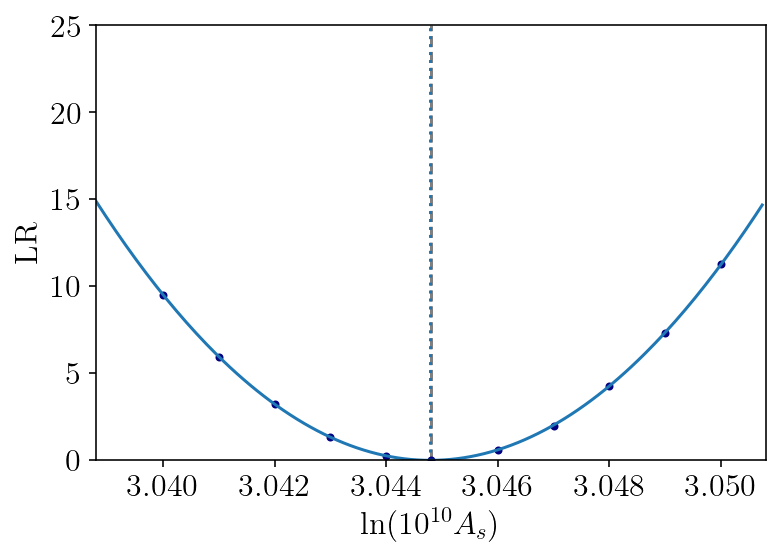

In [19]:
#### Compute Asimov error

#Fit parabola
[a,b,c], pcov = curve_fit(parab, xs_asimov, chi2_asimov, p0=[0.72, 1185714, 0.67], maxfev=30000)
fit_x = x_bins_fine
fit_y = b * (fit_x-c)**2.
parabola_min = a

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("MLE: ", c)
zeros = fsolve(parabola, x0=[0.0,5.])
sigma = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma)
sigma_asimov = sigma


# Plot
plt.plot(xs_asimov, chi2_asimov, marker=".", ls="", color="navy")
plt.plot(fit_x, fit_y, color='tab:blue', ls='-')
plt.vlines(x_true, 0, 25, color="grey", ls="--")
plt.vlines(c, 0, 25, color="tab:blue", ls=":")
plt.hlines(1, 0.65, 0.70, color="tab:blue", ls=":")
plt.ylabel("LR")
plt.xlabel(xname)
plt.ylim([0,25])
plt.xlim([x_true-x_lim, x_true+x_lim])

plt.show()

In [20]:
# Adapt x bin settings
x_lim = 4*sigma_asimov
x_bin_width = x_lim/10.
x_bins = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

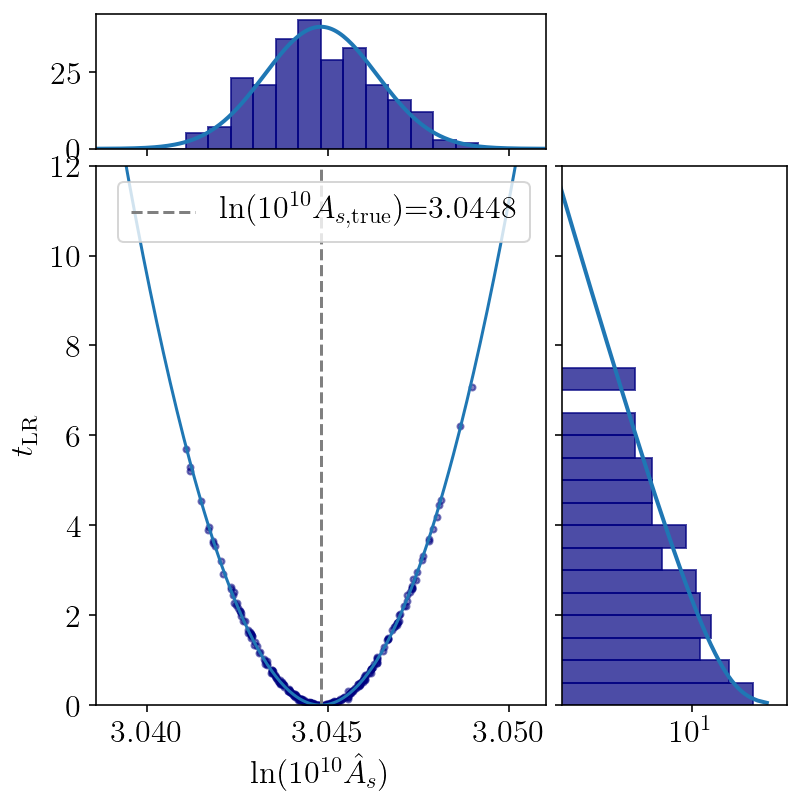

In [21]:
#### LR triangle plot
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 2), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(x_hat, LR, color="navy", marker=".", alpha=0.5)
ax.plot(x_bins_fine, (x_bins_fine-x_true)**2/sigma_asimov**2, color='tab:blue', ls='-')
ax.vlines(x_true, 0, bin_max, ls="--", color="grey", label=xname_true+r"$ = $"+str(x_true))
ax.set_xlim([x_true-x_lim, x_true+x_lim])
ax.set_ylim([0,bin_max])
ax.set_xlabel(xname_hat)
ax.set_ylabel(r"$t_\mathrm{LR}$")
ax.legend()

# Hist x
ax_histx.hist(x_hat, bins=x_bins, color="navy", alpha=0.7, edgecolor='navy')
ax_histx.plot(x_bins_fine, norm_x*Gauss.pdf(x_bins_fine, loc=x_true, scale=sigma_asimov), color='tab:blue', lw=2)

# Hist y
ax_histy.hist(LR, bins=bins, orientation='horizontal', color="navy", alpha=0.7, edgecolor='navy')
ax_histy.plot(norm*chi2.pdf(bins_fine, df=1), bins_fine, color='tab:blue', lw=2)
ax_histy.set_xlim([5e-2,5e2])
ax_histy.set_xscale("log")

plt.savefig("LR_hist_fixed_NP_A_s.pdf", format="PDF")
plt.show()

In [25]:
# Find \Delta\chi^2 for which 68.27% of mocks are below
LR_cutoff = 1.04
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

68.0 % of mocks below:  1.04


In [23]:
# Compare sigma_asimov and sigma_mocks:
print("sigma_asimov: ", sigma_asimov)
print("sigma_mocks: ", np.std(x_hat))

sigma_asimov:  0.0015523625784608086
sigma_mocks:  0.0015784655013322277
